##SIGMOD REGRESSION






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


#To do 1

In [ ]:
def logistic_function(x):
    """
    Arguments:
       x: scalar or numpy array of any size.
    Returns:
       y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y

#test


In [ ]:
# Test the function with the provided test case
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

# Run the test case
test_logistic_function()

All tests passed!


#To do 2


In [ ]:
def log_loss(y_true, y_pred):
    """
    Arguments:
       y_true (scalar): true target value {0 or 1}.
       y_pred (scalar): predicted target value {0-1}.
    Returns:
       loss (float): loss/error value
    """
    import numpy as np
    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Log loss formula: L(y, ŷ) = -y * log(ŷ) - (1-y) * log(1-ŷ)
    loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

    return loss

#test


In [ ]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
    y_true = 1
    y_pred = 0
    try:
        log_loss(y_true, y_pred)  # This should raise an error due to log(0)
    except ValueError:
        pass  # Test passed if ValueError is raised for log(0)

    # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
    y_true = 0
    y_pred = 1
    try:
        log_loss(y_true, y_pred)  # This should raise an error due to log(0)
    except ValueError:
        pass  # Test passed if ValueError is raised for log(0)

    # Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")

# Run the test case
test_log_loss()

All tests passed!


#To do 3

In [ ]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
        y_true (array_like, shape (n,)): array of true values (0 or 1)
        y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
        cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"

    n = len(y_true)

    # Calculate loss for each observation and sum them up
    total_loss = 0
    for i in range(n):
        total_loss += log_loss(y_true[i], y_pred[i])

    # Average loss
    cost = total_loss / n
    return cost=

In [ ]:
# Test the cost function
import numpy as np

def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Expected output: Manually calculate cost for these values
    # log_loss(y_true, y_pred) for each example
    expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                     -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                     -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

    # Call the cost_function to get the result
    result = cost_function(y_true, y_pred)

    # Assert that the result is close to the expected cost with a tolerance of 1e-6
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

# Run the test case
test_cost_function()

Test passed for simple case!


#To do 4

In [ ]:
def costfunction_logreg(X, y, w, b):
    """
    Args:
        X (ndarray, shape (m,n)): data on features, m observations with n features.
        y (array_like, shape (m,)): array of true values of target (0 or 1).
        w (array_like, shape (n,)): weight parameters of the model.
        b (float): bias parameter of the model.

    Returns:
        cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute z = X * w + b (linear combination)
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost_function we already implemented
    cost = cost_function(y, y_pred)

    return cost

In [ ]:
# Test the costfunction_logreg
print("Testing costfunction_logreg:")

# Test case from the worksheet
X = np.array([[10, 20], [-10, 10]])  # shape (2, 2)
y = np.array([1, 0])  # shape (2,)
w = np.array([0.5, 1.5])  # shape (2,)
b = 1  # scalar

# Calculate cost
cost = costfunction_logreg(X, y, w, b)
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {cost}")

# Let's manually verify this step by step:
print("\nStep-by-step verification:")
print(f"1. X shape: {X.shape}, y shape: {y.shape}, w shape: {w.shape}")
print(f"2. Compute z = X * w + b:")
z = np.dot(X, w) + b
print(f"   z = {z}")
print(f"3. Apply sigmoid to get predictions:")
y_pred = logistic_function(z)
print(f"   y_pred = {y_pred}")
print(f"4. Calculate cost using cost_function:")
manual_cost = cost_function(y, y_pred)
print(f"   cost = {manual_cost}")
print(f"5. Our function returned: {cost}")
print(f"   Match: {np.isclose(cost, manual_cost)}")

Testing costfunction_logreg:
cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906

Step-by-step verification:
1. X shape: (2, 2), y shape: (2,), w shape: (2,)
2. Compute z = X * w + b:
   z = [36. 11.]
3. Apply sigmoid to get predictions:
   y_pred = [1.        0.9999833]
4. Calculate cost using cost_function:
   cost = 5.500008350834906
5. Our function returned: 5.500008350834906
   Match: True


#To do 5

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.

    Args:
        X (ndarray, shape (n,d)): Input data, n observations with d features
        y (array_like, shape (n,)): True labels (0 or 1)
        w (array_like, shape (d,)): Weight parameters of the model
        b (float): Bias parameter of the model

    Returns:
        grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
        grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    # Compute gradients
    # Formula: ∂L/∂w = (1/n) * X^T * (y_pred - y)
    # Formula: ∂L/∂b = (1/n) * sum(y_pred - y)
    error = y_pred - y
    grad_w = np.dot(X.T, error) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.sum(error) / n  # Gradient w.r.t bias, scalar

    return grad_w, grad_b

In [ ]:
# Simple test case from the worksheet
X = np.array([[10, 20], [-10, 10]]) # shape (2, 2)
y = np.array([1, 0]) # shape (2,)
w = np.array([0.5, 1.5]) # shape (2,)
b = 1 # scalar

# Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


#To Do 6

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
        X (ndarray, shape (n,d)): Data on features, n observations with d features
        y (array_like, shape (n,)): True values of target (0 or 1)
        w (array_like, shape (d,)): Initial weight parameters
        b (float): Initial bias parameter
        alpha (float): Learning rate
        n_iter (int): Number of iterations
        show_cost (bool): If True, displays cost every 100 iterations
        show_params (bool): If True, displays parameters every 100 iterations

    Returns:
        w (array_like, shape (d,)): Optimized weight parameters
        b (float): Optimized bias parameter
        cost_history (list): List of cost values over iterations
        params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

In [ ]:
# Simple assertion test for gradient_descent
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
    y = np.array([1, 0]) # Shape (2,)
    w = np.zeros(X.shape[1]) # Shape (2,)
    b = 0.0 # Scalar
    alpha = 0.1 # Learning rate
    n_iter = 100 # Number of iterations

    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)

    # Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")

# Run the test
test_gradient_descent()

All tests passed!


#To do 7

In [ ]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
        X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
        w (ndarray, shape (d,)): Array of weights learned via gradient descent.
        b (float): Bias learned via gradient descent.
        threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
        y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    z = np.dot(X, w) + b
    y_test_prob = logistic_function(z)

    # Classify based on the threshold
    # If probability >= threshold, predict class 1, else predict class 0
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [ ]:
# A simple assertion test for Prediction Function
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
    w_test = np.array([1.0, -1.0]) # Shape (2,)
    b_test = 0.0 # Scalar bias
    threshold = 0.5 # Default threshold

    # Updated expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assert that the output matches the expected output
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

# Run the test
test_prediction()

Test passed!


##Softmax Regression

#To do 1 Implement the Softmax Function

In [ ]:
def softmax(z):
    """
    Compute the softmax of a 2D numpy array along the specified axis.

    Parameters:
        z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples and n is the number of classes.

    Returns:
        numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where each row sums to 1 and
                       represents the probability distribution over classes for a sample.

    Notes:
        - Applies a normalization trick to prevent numerical instability by subtracting the max value in each row before exponentiation.
    """
    # Normalize input to prevent numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
# Test Cases for Softmax Function
def test_softmax():
    """
    Perform basic assertion tests on the softmax function to validate its correctness.

    Tests:
    - Ensure that the output probabilities sum to 1 for each row.
    - Ensure non-negative values (all probabilities should be >= 0).
    - Test on edge cases (e.g., all zeros, very large or small values).
    """

    # Test input
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]

    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)

        # Check that probabilities sum to 1
        assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"

        # Check non-negativity
        assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"

        print(f"  Input: {z}")
        print(f"  Output: {result}")
        print(f"  Sum of row: {result.sum(axis=1)[0]:.6f}")
        print("  Passed.")

    print("\nAll tests passed for softmax function!")

# Run the test
test_softmax()

Test 1: All zeros
  Input: [[0 0 0]]
  Output: [[0.33333333 0.33333333 0.33333333]]
  Sum of row: 1.000000
  Passed.
Test 2: Simple case
  Input: [[1 2 3]]
  Output: [[0.09003057 0.24472847 0.66524096]]
  Sum of row: 1.000000
  Passed.
Test 3: Large identical values
  Input: [[1000 1000 1000]]
  Output: [[0.33333333 0.33333333 0.33333333]]
  Sum of row: 1.000000
  Passed.
Test 4: Small identical values
  Input: [[-1000 -1000 -1000]]
  Output: [[0.33333333 0.33333333 0.33333333]]
  Sum of row: 1.000000
  Passed.
Test 5: Mixed positive and negative
  Input: [[ 1  0 -1]]
  Output: [[0.66524096 0.24472847 0.09003057]]
  Sum of row: 1.000000
  Passed.

All tests passed for softmax function!


#To do 2 Implement the Loss Function for Softmax

In [ ]:
# Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
        y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
        y_pred (numpy.ndarray): Predicted probabilities of shape (c,).

    Returns:
        float: Cross-entropy loss for the observation.
    """
    # Add epsilon to prevent log(0)
    return -np.sum(y_true * np.log(y_pred + 1e-10))

In [ ]:
# Test Cases for Categorical Log-Loss Function
def test_loss_softmax():
    """
    Test the loss_softmax function using a known input and output.
    """
    # Test Case 1: Perfect prediction
    y_true = np.array([0, 1, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.1, 0.8, 0.1])  # Predicted probabilities
    expected_loss = -np.log(0.8)  # Expected loss for perfect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.3, 0.4, 0.3])  # Predicted probabilities
    expected_loss = -np.log(0.3)  # Expected loss for incorrect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"

    # Test Case 3: Edge case with near-zero probability
    y_true = np.array([0, 1, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.01, 0.98, 0.01])  # Predicted probabilities
    expected_loss = -np.log(0.98)  # Expected loss for edge case
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"

    print("All test cases passed!")

# Run the test
test_loss_softmax()

All test cases passed!


#To do 3 Implement the Cost Function for Softmax

In [ ]:
# Cost Function for Softmax (Average Loss)
def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (n, d).
        y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
        W (numpy.ndarray): Weight matrix of shape (d, c).
        b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
        float: Average cross-entropy cost over all samples.
    """
    n, d = X.shape
    # Compute linear combination: z = X * W + b
    z = np.dot(X, W) + b

    # Compute predictions using softmax
    y_pred = softmax(z)

    # Compute average cross-entropy loss
    # Add epsilon to prevent log(0)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [ ]:
# Testing the Cost Function
def test_cost_softmax():
    """
    Test the cost_softmax function using a known input and output.
    """
    # Test Case 1: Small dataset with perfect predictions
    X = np.array([[1, 2], [2, 3], [3, 4]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]])  # True labels (n=3, c=2, one-hot encoded)
    W = np.array([[1, -1], [-1, 1]])  # Weight matrix (d=2, c=2)
    b = np.array([0, 0])  # Bias vector (c=2)

    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Predicted probabilities

    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]  # Compute expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"

    # Test Case 2: All-zero weights and bias
    X = np.array([[1, 0], [0, 1], [1, 1]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]])  # True labels (n=3, c=2, one-hot encoded)
    W = np.zeros((2, 2))  # Zero weight matrix
    b = np.zeros(2)  # Zero bias vector

    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Predicted probabilities (uniform distribution)

    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]  # Compute expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"

    print("All test cases passed!")

# Run the test
test_cost_softmax()

All test cases passed!


#To do 4 Implement the Gradient Computation for Softmax

In [ ]:
# Gradient Computation for Softmax Regression
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (n, d).
        y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
        W (numpy.ndarray): Weight matrix of shape (d, c).
        b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
        tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape

    # Forward pass
    z = np.dot(X, W) + b          # Linear combination: shape (n, c)
    y_pred = softmax(z)           # Predictions: shape (n, c)

    # Backward pass (gradients)
    # Formula: grad_W = (1/n) * X^T * (y_pred - y)
    # Formula: grad_b = (1/n) * sum(y_pred - y) across samples
    error = y_pred - y            # Shape (n, c)
    grad_W = np.dot(X.T, error) / n  # Shape (d, c)
    grad_b = np.sum(error, axis=0) / n  # Shape (c,)

    return grad_W, grad_b

In [ ]:
# Test function for compute_gradient_softmax
def test_compute_gradient_softmax():
    # Define simple inputs
    X = np.array([[1, 2], [3, 4]])  # Shape (2, 2)
    y = np.array([[1, 0], [0, 1]])  # Shape (2, 2), one-hot encoded
    W = np.array([[0.1, 0.2], [0.3, 0.4]])  # Shape (2, 2)
    b = np.array([0.01, 0.02])  # Shape (2,)

    # Expected gradients (calculated manually or using a reference implementation)
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    # Manual calculation of expected gradients
    error = y_pred - y
    grad_W_expected = np.dot(X.T, error) / X.shape[0]
    grad_b_expected = np.sum(error, axis=0) / X.shape[0]

    # Compute gradients using the function
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    # Assertions
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"

    print("All tests passed for compute_gradient_softmax!")

    # Print results for verification
    print(f"\nInput shapes: X{X.shape}, y{y.shape}, W{W.shape}, b{b.shape}")
    print(f"Computed grad_W shape: {grad_W.shape}")
    print(f"Computed grad_b shape: {grad_b.shape}")

# Run the test
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!

Input shapes: X(2, 2), y(2, 2), W(2, 2), b(2,)
Computed grad_W shape: (2, 2)
Computed grad_b shape: (2,)


#To do 5 Implement Gradient Descent for Softmax

In [ ]:
# Gradient Descent for Softmax Regression
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (n, d).
        y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
        W (numpy.ndarray): Weight matrix of shape (d, c).
        b (numpy.ndarray): Bias vector of shape (c,).
        alpha (float): Learning rate.
        n_iter (int): Number of iterations.
        show_cost (bool): Whether to display the cost at intervals.

    Returns:
        tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update parameters (move opposite to gradient)
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute and store cost
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Optionally print progress
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history

Running gradient descent for softmax regression...
Data: 100 samples, 5 features, 3 classes
Initial cost: 1.098303


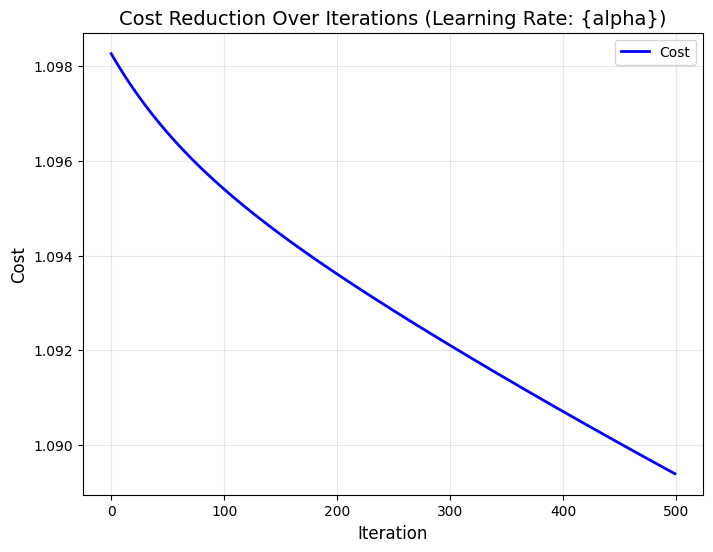


Initial Cost: 1.098262
Final Cost: 1.089395
Cost reduction: 0.81%


In [ ]:
# Test for gradient_descent_softmax with plot
def test_gradient_descent_softmax_with_plot():
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 100, 5, 3  # 100 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1  # One-hot encoding

    # Initialize weights and biases
    W = np.random.randn(d, c) * 0.01  # Small random weights
    b = np.random.randn(c) * 0.01     # Small random biases

    # Parameters for gradient descent
    alpha = 0.01  # Learning rate
    n_iter = 500  # Number of iterations

    print("Running gradient descent for softmax regression...")
    print(f"Data: {n} samples, {d} features, {c} classes")
    print(f"Initial cost: {cost_softmax(X, y, W, b):.6f}")

    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

    # Plot the cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost", color='blue', linewidth=2)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Cost", fontsize=12)
    plt.title("Cost Reduction Over Iterations (Learning Rate: {alpha})", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Final cost should ideally be less than initial cost
    print(f"\nInitial Cost: {cost_history[0]:.6f}")
    print(f"Final Cost: {cost_history[-1]:.6f}")
    print(f"Cost reduction: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.2f}%")

# Run the test
test_gradient_descent_softmax_with_plot()